# PPA genres - exploring topics

This notebook contains code for exploring topic modeling results for genre-focused pages in the "literary" collection of the Princeton Prosody Archive. It uses Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), and much of the code is adapted from Melanie Walsh's [Introduction to Cultural Analytics](http://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/08-Topic-Modeling-Text-Files.html).

The corpus file `filtered_ppa_corpus.csv` and the directory `ppa-100-topics_all` are required for this notebook.

In [34]:
#!pip install little_mallet_wrapper

In [1]:
import pandas as pd
import re

from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import glob
from pathlib import Path

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import little_mallet_wrapper as lmw

pd.set_option('display.max_rows', 100)

<h2>Load topic model</h2>

In [2]:
num_topics=100
output_directory_path = 'topic-model-output/ppa-100-topics_all/'


Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [3]:
path_to_training_data[0:500]

'topic-model-output/ppa-100-topics_all//training.txt'

In [4]:
topics = lmw.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['verse', 'rhythm', 'line', 'lines', 'prose', 'blank', 'one', 'metrical', 'may', 'syllables', 'time', 'two', 'music', 'words', 'form', 'metre', 'pause', 'english', 'end', 'use']

✨Topic 1✨

['sir', 'john', 'william', 'song', 'browne', 'thomas', 'drayton', 'jonson', 'george', 'donne', 'love', 'ben', 'lord', 'iii', 'death', 'wither', 'herrick', 'poems', 'note', 'drummond']

✨Topic 2✨

['years', 'life', 'year', 'published', 'born', 'poems', 'died', 'college', 'first', 'london', 'time', 'one', 'cambridge', 'death', 'poet', 'became', 'work', 'father', 'oxford', 'two']

✨Topic 3✨

['chaucer', 'tale', 'lydgate', 'see', 'gower', 'french', 'balade', 'english', 'love', 'may', 'mss', 'tales', 'poem', 'iii', 'also', 'thou', 'god', 'king', 'poems', 'ant']

✨Topic 4✨

['ode', 'odes', 'pindar', 'strophe', 'pindaric', 'epode', 'one', 'greek', 'antistrophe', 'strophes', 'cowley', 'gray', 'irregular', 'may', 'great', 'english', 'regular', 'lyric', 'chorus', 'collins']

✨Topic 5✨

['war', 'men

In [5]:
topic_distributions = lmw.load_topic_distributions(path_to_topic_distributions)

<h2>Get documents</h2>

In [6]:
df=pd.read_csv("filtered_ppa_corpus.csv")

In [7]:
df["pub_year"] = pd.to_numeric(df["pub_year"], errors="coerce")

df = df[(df["pub_year"] >= 1559) & (df["pub_year"] <= 1929)].copy()

In [8]:
training_data = [lmw.process_string(text, numbers='remove') for text in df['page_text']]

In [9]:
original_texts = [text for text in df['page_text']]

page_ids = [title for title in df['page_id']]

training_data_page_ids = dict(zip(training_data, page_ids))

training_data_original_text = dict(zip(training_data, original_texts))

In [10]:
def display_top_titles_per_topic(topic_number, number_of_documents):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in lmw.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_page_ids[document] + "\n")
    return

In [12]:
display_top_titles_per_topic(topic_number=18, number_of_documents=5)

✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']

0.9943 loc.ark:/13960/t0ht37886.00000098

0.9943 uva.x030751029.00000098

0.9943 uva.x030751029.00000098

0.9943 uva.x030751029.00000098

0.9905 uva.x030751029.00000098



In [13]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=114, number_of_documents=10, custom_words=None):

    for probability, document in lmw.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        page_id = f"**{training_data_page_ids[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(page_id), display(Markdown(original_text))
    return

In [16]:
display_bolded_topic_words_in_context(topic_number=18, number_of_documents=10)

✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9943036554157394**

'**loc.ark:/13960/t0ht37886.00000098**'

XCli THE PRINCIPLES OF POETRY 
 
 with the characteristics which it possessed in days when a primitive 
 community met to celebrate some event affecting all alike. Such an 
 event was the outburst of war, a victory, a defeat, the propitiation of 
 the gods, the completion of the harvest, the return of spring-tide, mar- 
 riage, the initiation of the stripling into the order of warriors, or the 
 funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula- 
 tion, and **song**, all gave utterance in unison to the feeling common to 
 all. Nowadays the **song** or **lyric** is the utterance of personal and highly 
 specialized emotion — more often the allusive suggestion of it than its 
 definite relation in expression. In those days the crowd felt and moved 
 and spoke as **one** person ; the emotion was not highly spiritual, to be 
 sure, but broad, readily understood, and universally felt, because it 
 sprang from simple physical and social necessities common to all. 
 Now **one** and now another voice would improvise a shout, a yell of 
 **communal** joy or grief, in which all might join. Or, for the tune to 
 which they danced and sang some monotonous **refrain**, formerly impro- 
 vised, new words would here and there be suggested, to be caught from 
 the lips by the chanting assembly ; and so were added new verses to 
 the choral **song**. Such chorals were characterized by infinite repetition 
 of both words and melody ; and by means of this infinite and nerve- 
 racking round the crowd would, on occasion, work itself into some such 
 frenzy as to-day marks the climax of a negro camp-meeting. 
 
 In the course of time **one** or another factor of the choral **dance** would, 
 however, be separately emphasized. The mimicry, for instance, might 
 drop away, and some individual would lead the crowd in a better 
 ordered and more stately, if less spontaneous, psalm or hymn of praise. 
 The medicine man or priest — or the college of priests — would add 
 new words to the **old** incantation ; perhaps, in time, largely recom- 
 pose it. But since it was originally intended for the **singing** or listen- 
 ing crowd, though it finally might reach, by conscious artistry, the 
 excellence of a psalm such as we find in the bibles of many races, it 
 would still express the feeling of the **folk** and appeal to the **folk** as a 
 whole. 
 
 Poetry of Recital : Ballad, Hero-saga, Gest. — In similar fashion 
 the **song**-element and the rhythmic evolutions of the crowd might 
 at times sink into abeyance, because somewhere in the assemblage 
 some **one** had begun the recital of the deeds of the god or hero whom 
 all were celebrating. Here, probably, was the birth — at any rate the 
 germ — of hero-saga and **popular** **ballad**. These derived from the 
 mother-choral qualities of **lyric** and drama, as well as of recital ; but 
 the narrative element was from the beginning to the fore. Just as in 
 the case of the ceremonial hymn, and of the priest who recomposed and 
 chanted it, the primitive recital would slowly develop into independent 
 


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9943036554157394**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9943036554157394**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9943036554157394**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9905376056290631**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


<h2>Explore topics</h2>

In [17]:
#Topic 18

display_bolded_topic_words_in_context(topic_number=18, number_of_documents=10)

✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9943036554157394**

'**loc.ark:/13960/t0ht37886.00000098**'

XCli THE PRINCIPLES OF POETRY 
 
 with the characteristics which it possessed in days when a primitive 
 community met to celebrate some event affecting all alike. Such an 
 event was the outburst of war, a victory, a defeat, the propitiation of 
 the gods, the completion of the harvest, the return of spring-tide, mar- 
 riage, the initiation of the stripling into the order of warriors, or the 
 funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula- 
 tion, and **song**, all gave utterance in unison to the feeling common to 
 all. Nowadays the **song** or **lyric** is the utterance of personal and highly 
 specialized emotion — more often the allusive suggestion of it than its 
 definite relation in expression. In those days the crowd felt and moved 
 and spoke as **one** person ; the emotion was not highly spiritual, to be 
 sure, but broad, readily understood, and universally felt, because it 
 sprang from simple physical and social necessities common to all. 
 Now **one** and now another voice would improvise a shout, a yell of 
 **communal** joy or grief, in which all might join. Or, for the tune to 
 which they danced and sang some monotonous **refrain**, formerly impro- 
 vised, new words would here and there be suggested, to be caught from 
 the lips by the chanting assembly ; and so were added new verses to 
 the choral **song**. Such chorals were characterized by infinite repetition 
 of both words and melody ; and by means of this infinite and nerve- 
 racking round the crowd would, on occasion, work itself into some such 
 frenzy as to-day marks the climax of a negro camp-meeting. 
 
 In the course of time **one** or another factor of the choral **dance** would, 
 however, be separately emphasized. The mimicry, for instance, might 
 drop away, and some individual would lead the crowd in a better 
 ordered and more stately, if less spontaneous, psalm or hymn of praise. 
 The medicine man or priest — or the college of priests — would add 
 new words to the **old** incantation ; perhaps, in time, largely recom- 
 pose it. But since it was originally intended for the **singing** or listen- 
 ing crowd, though it finally might reach, by conscious artistry, the 
 excellence of a psalm such as we find in the bibles of many races, it 
 would still express the feeling of the **folk** and appeal to the **folk** as a 
 whole. 
 
 Poetry of Recital : Ballad, Hero-saga, Gest. — In similar fashion 
 the **song**-element and the rhythmic evolutions of the crowd might 
 at times sink into abeyance, because somewhere in the assemblage 
 some **one** had begun the recital of the deeds of the god or hero whom 
 all were celebrating. Here, probably, was the birth — at any rate the 
 germ — of hero-saga and **popular** **ballad**. These derived from the 
 mother-choral qualities of **lyric** and drama, as well as of recital ; but 
 the narrative element was from the beginning to the fore. Just as in 
 the case of the ceremonial hymn, and of the priest who recomposed and 
 chanted it, the primitive recital would slowly develop into independent 
 


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9943036554157394**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9943036554157394**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9943036554157394**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9905376056290631**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


✨Topic 18✨

['song', 'ballad', 'songs', 'ballads', 'poetry', 'music', 'dance', 'popular', 'lyric', 'one', 'sung', 'folk', 'refrain', 'old', 'people', 'singing', 'communal', 'like', 'see', 'may']



✨✨✨

**0.9867715558423868**

'**uva.x030751029.00000098**'

xcii
THE PRINCIPLES OF POETRY
-
with the characteristics which it possessed in days when a primitive
community met to celebrate some event affecting all alike. Such an
event was the outburst of war, a victory, a defeat, the propitiation of
the gods, the completion of the harvest, the return of spring-tide, mar-
riage, the initiation of the stripling into the order of warriors, or the
funeral of a hero, — and then with **dance** and **music**, mimicry, gesticula-
tion, and **song**, all gave utterance in unison to the feeling common to
all. Nowadays the **song** or **lyric** is the utterance of personal and highly
specialized emotion more often the allusive suggestion of it than its
definite relation in expression. In those days the crowd felt and moved
and spoke as **one** person; the emotion was not highly spiritual, to be
sure, but broad, readily understood, and universally felt, because it
sprang from simple physical and social necessities common to all.
Now **one** and now another voice would improvise a shout, a yell of
**communal** joy or grief, in which all might join. Or, for the tune to
which they danced and sang some monotonous **refrain**, formerly impro-
vised, new words would here and there be suggested, to be caught from
the lips by the chanting assembly; and so were added new verses to
the choral **song**. Such chorals were characterized by infinite repetition
of both words and melody; and by means of this infinite and nerve-
racking round the crowd would, on occasion, work itself into some such
frenzy as to-day marks the climax of a negro camp-meeting.
In the course of time **one** or another factor of the choral **dance** would,
however, be separately emphasized. The mimicry, for instance, might
drop away, and some individual would lead the crowd in a better
ordered and more stately, if less spontaneous, psalm or hymn of praise.
The medicine man or priest — or the college of priests — would add
new words to the **old** incantation; perhaps, in time, largely recom-
pose it. But since it was originally intended for the **singing** or listen-
ing crowd, though it finally might reach, by conscious artistry, the
excellence of a psalm such as we find in the bibles of many races, it
would still express the feeling of the **folk** and appeal to the **folk** as a
whole.
Poetry of Recital: Ballad, Hero-saga, Gest. — In similar fashion
the **song**-element and the rhythmic evolutions of the crowd might
at times sink into abeyance, because somewhere in the assemblage
some **one** had begun the recital of the deeds of the god or hero whom
all were celebrating. Here, probably, was the birth
at any rate the
germ — of hero-saga and **popular** **ballad**. These derived from the
mother-choral qualities of **lyric** and drama, as well as of recital; but
the narrative element was from the beginning to the fore.
Just as in
the case of the ceremonial hymn, and of the priest who recomposed and
chanted it, the primitive recital would slowly develop into independent


In [18]:
#Topic 20

display_bolded_topic_words_in_context(topic_number=20, number_of_documents=10)

✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.9938910052843398**

'**hvd.32044089057772.00000068**'

18
KING ESTMERE.
Now hearken to me sayes Adler yonge,
And your reade must rise* at me,
I quicklye will devise a waye
To sette **thy** ladye free.
My mother was a westerne woman,
And learned in gramaryèt,
And when I learned at the schole,
Something **shee** taught itt **mee**.
There growes an hearbe within this field,
And iff it were but knowne,
His color, which is whyte and redd,
It will make blacke and browne:
His color, which is browne and blacke,
Itt will make redd and whyte;
That sworde is not in all Englande,
Upon his coate will byte.
And you shal be a harper, brother
Out of the north countrye;
And Ile be your boy, soe faine of fighte,
And beare your harpe by your knee.
And you shal be the best harper,
That ever tooke harpe in hand;
And I wil be the best singer,
That ever sung in this lande.
Itt shal be written in our forheads
All and in grammaryè,
That we towe are the boldest men,
That are in all Christentyè.
And thus they renisht them to ryde,
On tow **good** renish steedes;
And when they **came** to King Adlands hall,
Of redd gold shone their weedes.
And whan the **came** to Kyng Adlands hall,
Untill the fayre hall yate,
There they found a proud portèr
Rearing himselfe thereatt.
Wee beene harpers, sayd Adler younge,
Come out of the northe countrye;
Wee beene **come** hither untill this place,
This proud weddinge for to **see**.
Sayd, And your color were white and redd,
As it is blacke and browne,
I wold saye King Estmere and his brother
Were comen untill this towne.
Then they pulled out a ryng of gold,
Layd itt on the porters arme:
And ever we will **thee**, proud portèr,
Thow wilt saye us no harme.
140
Sore he looked on Kyng Estmère,
And sore he handled the ryng,
Then opened to them the fayre hall yates,
He lett for no kind of thyng.
• Sic MS. † See at the end of this **ballad**, note
145
150
Sayes, Christ **thee** save, **thou** proud portèr; 175
Sayes, Christ **thee** save and **see**.
Nowe you be welcome, sayd the portèr,
Of what land soever ye bee.
155
160
165
170
180
185
190
Kyng Estmere he stabled his steede
Soe fayre att the hall bord;
The froth, that **came** from his brydle bitte,
Light in King Bremors beard."
Saies, Stable **thy** steed, **thou** proud harpèr,
Saies, stable him in the stalle:
It doth not beseeme a proud harpèr
To stable him' in a kyngs halle
My ladde he is so lither, he said,
He will doe nought that's meete;
And is there any **man** in this hall
Were able him to beate?
O let that **man** **come** downe, he said,
A sight of him wold I **see**;
And when **hee** hath beaten **well** my ladd,
Then he shall beate of **mee**.
Downe then **came** the kemperye **man**
And looked him in the eare;
For all the gold, that was under heaven,
He durst not neigh him neare.
[Spaine,
Thou speakst proud words, sayes the King of
Thou harper, here to **mee**:
There is a **man** within this halle
Will beate **thy** ladd and **thee**.
He saies, It is writt in his forhead
All and in gramaryè,
That for all the gold that is under heaven
I dare not neigh him nye.
Then Kyng Estmere pulld forth his harpe,
And plaid a pretty thinge:
The ladye upstart from the borde,
And wold have gone from the **king**.
Stay **thy** harpe, **thou** proud harpèr,
For Gods love I pray **thee**,
For and **thou** playes as **thou** beginns,
Thou'lt till my bryde from **mee**.
He stroake upon his harpe againe,
And playd a pretty thinge;
The ladye lough a loud laughter,
As **shee** sate by the **king**.
And how nowe, kempe, said the Kyng of Spaine,
And how what aileth **thee**?
220
Saies, Sell me **thy** harpe, **thou** proud harper,
And **thy** stringès all,
For as many gold nobles '**thou** shalt have'
As heere bee ringes in the hall.
What wold ye doe with my harpe, he sayd,'
If I did sell it yee?
"To playe my wiffe and me a Fitt*,
When abed together wee bee."
195
200
V. 202; To stable his steede, fol. MS.
205
• i. e. entice. Vid. Gloss.
1. e. a tune, or strain of musis. See Gloss.
210
215
225
230
235
Now sell me, quoth **hee**, **thy** bryde soe gay, 245
As **shee** sitts by **thy** knee,
And as many gold nobles I will give,
As leaves been on a tree.
240


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.9890428755241893**

'**hvd.32044089057764.00000062**'

18
KING ESTMERE.
Now hearken to me sayes Adler yonge,
And your reade must rise at me,
I quicklye will devise a waye
To sette **thy** ladye free.
My mother was a westerne woman,
And learned in gramaryèt,
And when I learned at the schole,
Something **shee** taught itt **mee**.
There growes an hearbe within this field,
And iff it were but knowne,
His color, which is whyte and redd,
It will make blacke and browne:
His color, which is browne and blacke,
Itt will make redd and whyte;
That sworde is not in all Englande,
Upon his coate will byte.
And you shal be a harper, brother
Out of the north countrye;
And Ile be your boy, soe faine of fighte,
And beare your harpe by your knee.
And you shal be the best harper,
That ever tooke harpe in hand;
And I wil be the best singer,
That ever sung in this lande.
Itt shal be written in our forheads
All and in grammaryè,
That we towe are the boldest men,
That are in all Christentyè.
And thus they renisht them to ryde,
On tow **good** renish steedes;
And when they **came** to King Adlands hall,
Of redd gold shone their weedes.
And whan the **came** to Kyng Adlands hall,
Untill the fayre hall yate,
There they found a proud portèr
Rearing himselfe thereatt.
Sayes, Christ **thee** save, **thou** proud portèr;
Sayes. Christ **thee** save and **see**.
Nowe you be welcome, sayd the portèr,
Of what land soever ye bee.
Wee beene harpers, sayd Adler younge,
Come out of the northe countrye;
Wee beene **come** hither untill this place,
This proud weddinge for to **see**.
Sayd, And your color were white and redd,
As it is blacke and browne,
I wold saye King Estmere and his brother
Were comen untill this towne.
Then they pulled out a ryng of gold,
Layd itt on the porters arme:
And ever we will **thee**, proud portèr,
Thow wilt saye us no harme.
Sore he looked on Kyng Estmère,
And sore he handled the ryng,
Then opened to them the fayre hall yates,
He lett for no kind of thyng.
† See at the end of this **ballad**, note
• Sic MS.
140
145
150
155
160
165
170
175
180
185
190
Kyng Estmere he stabled his steede
Soe fayre att the hall bord;
The froth, that **came** from his brydle bitte,
Light in King Bremors beard."
Saies, Stable **thy** steed, **thou** proud harpèr,
Saies, stable him in the stalle:
It doth not beseeme a proud harpèr
To stable him' in a kyngs halle
My ladde he is so lither, he said,
He will doe nought that's meete;
And is there any **man** this hall
Were able him to beate?
O let that **man** **come** downe, he said,
A sight of him wold I **see**;
And when **hee** hath beaten **well** my ladd,
Then he shall beate of **mee**.
Downe then **came** the kemperye **man**
And looked him in the eare;
For all the gold, that was under heaven,
He durst not neigh him neare.
[Spaine,
Thou speakst proud words, sayes the King of
Thou harper, here to **mee**:
There is a **man** within this halle
Will beate **thy** ladd and **thee**.
He saies, It is writt in his forhead
All and in gramaryè,
That for all the gold that is under heaven
I dare not neigh him nye.
Then Kyng Estmere pulld forth his harpe,
And plaid a pretty thinge:
The ladye upstart from the borde,
And wold have gone from the **king**.
Stay **thy** harpe, **thou** proud harper,
For Gods love I pray **thee**,
For and **thou** playes as **thou** beginns,
Thou'lt till my bryde from **mee**.
He stroake upon his harpe againe,
And playd a pretty thinge;
The ladye lough a loud laughter,
As **shee** sate by the **king**.
And how nowe, kempe, said the Kyng of Spaine,
And how what aileth **thee**?
220
Saies, Sell me **thy** harpe, **thou** proud harper,
And **thy** stringès all,
For as many gold nobles '**thou** shalt have'
As heere bee ringes in the hall.
What wold ye doe with my harpe, 'he sayd,'
If I did sell it yee?
"To playe my wiffe and me a Fitt*,
When abed together wee bee."
195
Now sell me, quoth **hee**, **thy** bryde soe gay,
As **shee** sitts by **thy** knee,
And as many gold nobles I will give,
As leaves been on a tree.
200
V. 202; To stable his steede, fol. MS.
i. e. entice. Vid. Gloss.
1. e. a tune, or strain of musis. See Gloss.
205 *
210
215
225
230
235
240
245
י


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.9880801195369188**

'**uc1.b3129803.00000297**'

THE BEGGAR-MAID.
193
Thou shalt go shift **thee** cleane.
What is **thy** name, **faire** maid? quoth he.
Penelophon, O **king**, quoth she:
With that she made a lowe courtsèy;
70
A trim **one** as I weene.
Thus hand in hand along they walke
Unto the **king**'s pallàce:
The **king** with courteous comly talke
This begger doth imbrace :
The begger blusheth scarlet red,
And straight againe
againe as pale as lead,
But not a word at all she said,
She was in such amaze.
At last she spake with trembling voyce,
And said, O **king**, I doe rejoyce
That you wil take me for your choyce,
And my degree's so base.
And when the wedding day was **come**.
The **king** commanded strait
The noblemen both all and some
Upon the queene to wait.
And she behaved herself that day,
As if she had never walkt the way;
She had forgot her gowne of gray,
Which she did weare of late.
The proverbe **old** is **come** to passe,
The priest, when he begins his masse,
Forgets that ever clerke he was;
He knowth not his estate.
75
80
85
90
* Shakespeare (who alludes to this **ballad** in his Love's Labour's
lost, act iv. sc. 1.) gives the beggar's name Zenelophon, according
to all the **old** editions: but this seems to be a corruption; for Pene-
lophon, in the text, sounds more like the name of a woman.-The
story of the King and the Beggar is also alluded to in K. Rich. II.
act v. sc. 3.
Ver. 90. i.e. tramped the streets.


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.9879859137323831**

'**uc1.b3310854.00000164**'

50
KING ESTMERE.
>
Itt doth not beseeme a proud harper
To stable him in a kyngs halle."
“My ladd he is so lither," he sayd,
“He will do nought that's meete;
And
aye
that I cold but find the **man**,
Were able him to beate."
205
"
“Thou speakst proud words," sayd the paynim kyng,
“ Thou harper here to **mee** :
There is a **man** within this halle,
That will beate **thy** lad and **thee**.”
210
“O lett that **man** **come** downe,” he sayd,
“A sight of him wold I **see**;
And whan **hee** hath beaten **well** my ladd,
Then he shall beate of **mee**."
Downe then **came** the kemperye **man**,
215
And looked him in the eare;
For all the gold, that was under heaven,
He durst not neigh him neare.
“ And how nowe, kempe,” sayd the Kyng of Spayne,
6 And how what aileth **thee**?”
220
He sayes, “ Itt is written in his forhead
All and in gramaryè,
That for all the gold that is under heaven,
I dare not neigh him nye.”
225
Kyng Estmere then pulled forth his harpe,
And played thereon so sweete:
Upstarte the ladye from the kynge,
As **hee** sate at the meate.
230
“Now stay **thy** harpe, **thou** proud harper,
Now stay **thy** harpe, I say;
For an **thou** playest as **thou** beginnest,
Thou'lt till 5
my
bride awaye."
V. 202, to stable his steede. fol. MS.
6 i.e. entice.- Vide Gloss. For gramarye, **see** the end of this **ballad**.


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.987890207001454**

'**mdp.39015059391907.00000240**'

138
BALLADS.
56. With that he swarved the maine-mast tree,
57.
Soe did **hee** itt with might and maine:
Horseley, with another broad arrow,
Strake the yeaman through the braine.
That **hee** ffell downe to the haches againe;
Sore of his wound that **hee** did bleed ;
Covetousness getts no gaine,
Itt is verry true, as the Welchman sayd,
58. But when **hee** saw his sisters sonne slaine,
Lord! in his heart **hee** was not **well**:
'Goe ffeitch me down my armour of prove,
Ffor I will to the topcastle my-selfe.
59.
60.
61.
'Goe ffeitch me downe my armour of prooffe,
For itt is guilded with gold soe cleere;
God be with my brother, John of Bartton!
Amongst the Portingalls **hee** did itt weare.'
But when **hee** had his armour of prooffe,
And on his body **hee** had itt on,
Every **man** that looked att him
Sayd, Gunn nor arrow **hee** neede feare none !
Come hither, Horsley!' sayes my **lord** Haward,
'And looke your shaft that itt goe right;
Shoot a **good** shoote in the time of need,
And ffor **thy** shooting thoust be made a knight.'
62. I'le doe my best,' sayes Horsley then,
Your Honor shall **see** beffore I goe;
If I shold be hanged att your mainemast,
I have in my shipp but arrowes tow.'
I


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.987890207001454**

'**mdp.39015059391907.00000240**'

138
BALLADS.
56. With that he swarved the maine-mast tree,
57.
Soe did **hee** itt with might and maine:
Horseley, with another broad arrow,
Strake the yeaman through the braine.
That **hee** ffell downe to the haches againe;
Sore of his wound that **hee** did bleed ;
Covetousness getts no gaine,
Itt is verry true, as the Welchman sayd,
58. But when **hee** saw his sisters sonne slaine,
Lord! in his heart **hee** was not **well**:
'Goe ffeitch me down my armour of prove,
Ffor I will to the topcastle my-selfe.
59.
60.
61.
'Goe ffeitch me downe my armour of prooffe,
For itt is guilded with gold soe cleere;
God be with my brother, John of Bartton!
Amongst the Portingalls **hee** did itt weare.'
But when **hee** had his armour of prooffe,
And on his body **hee** had itt on,
Every **man** that looked att him
Sayd, Gunn nor arrow **hee** neede feare none !
Come hither, Horsley!' sayes my **lord** Haward,
'And looke your shaft that itt goe right;
Shoot a **good** shoote in the time of need,
And ffor **thy** shooting thoust be made a knight.'
62. I'le doe my best,' sayes Horsley then,
Your Honor shall **see** beffore I goe;
If I shold be hanged att your mainemast,
I have in my shipp but arrowes tow.'
I


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.9877929631860047**

'**uva.x001496243.00000176**'

72
BALLADS.
28.
29.
30.
31.
32.
33.
34.
They cutt them downe the summer shroggs
Which grew both under a bryar,
And sett them three score rood in twinn,
To shoote the prickes full neare.
'Leade on, **good** ffellow,' sayd Sir Guye,
'Lead on, I doe bidd **thee** :'
'Nay, by my faith,' quoth Robin Hood,
The leader **thou** shalt bee.'
The first **good** shoot that Robin ledd,
Did not shoote an inch the pricke ffroe;
Guy was an archer **good** enoughe,
But he cold neere shoote soe.
The second shoote Sir Guy shott,
He shott within the garlande;
But Robin Hoode shott it better than **hee**,
For he clove the **good** pricke-wande.
'God's blessing on **thy** heart!' sayes Guye,
'Goode ffellow, **thy** shooting is goode;
For an **thy** hart be as **good** as **thy** hands,
Thou were better than Robin Hood.
'Tell me **thy** name, **good** ffellow,' quoth Guy,
Under the leaves of lyne :'
C
'Nay, by my faith,' quoth **good** Robin,
'Till **thou** have told me thine.'
'I dwell by dale and downe,' quoth Guye,
*And I have done many a curst turne;
And he that calles me by my right name,
Calles me Guye of **good** Gysborne.'


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.9874916297998451**

'**uva.x001496243.00000235**'

BALLADS.
131
7.
10.
8. 'Yes, that dare I!' sayes my Lord Chareles Howard,
Neere to the **king** wheras **hee** did stand;
If that Your Grace will give me leave,
My selfe wilbe the only **man**.'
II.
The **king** looket over his left shoulder,
Amongst his lords and barrons soe ffree:
'Have I never **lord** in all my realme
Will ffeitch yond traitor unto **mee**?'
9. 'Thou shalt have six hundred men,' saith our **king**,
'And chuse them out of my realme soe ffree:
Besids marriners and boyes,
To guide the great shipp on the sea.'
12.
'I'le goe speake with Sir Andrew,' sais Charles, my
Lord Haward,
Upon the sea, if **hee** be there ;
I will bring him and his shipp to shore,
Or before my prince I will never **come** neere.'
The ffirst of all my **lord** did call,
A noble gunner he was **one**;
This **man** was three score yeeres and ten,
And Peeter Simon was his name.
'Peeter,' sais **hee**, 'I must sayle to the sea,
To seeke out an enemye; God be my speed!
Before all others I have chosen **thee**;
Of a hundred guners thoust be my head.'
13. 'My **lord**,' sais **hee**, 'if you have chosen **mee**
Of a hundred gunners to be the head,
Hange me at your maine-mast tree
If I misse my marke past three pence bread.'


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.9874916297998451**

'**mdp.39015059391907.00000233**'

BALLADS.
131
7. The **king** looket over his left shoulder,
Amongst his lords and barrons soe ffree:
'Have I never **lord** in all my realme
Will ffeitch yond traitor unto **mee**?'
8. 'Yes, that dare I!' sayes my Lord Chareles Howard,
Neere to the **king** wheras **hee** did stand;
9.
10.
II.
12.
If that Your Grace will give me leave,
My selfe wilbe the only **man**.'
'Thou shalt have six hundred men,' saith our **king**,
'And chuse them out of my realme soe ffree:
Besids marriners and boyes,
To guide the great shipp on the sea.'
'I'le goe speake with Sir Andrew,' sais Charles, my
Lord Haward,
'Upon the sea, if **hee** be there;
I will bring him and his shipp to shore,
Or before my prince I will never **come** neere.'
The ffirst of all my **lord** did call,
A noble gunner he was **one**;
This **man** was three score yeeres and ten,
And Peeter Simon was his name.
'Peeter,' sais **hee**, 'I must sayle to the sea,
To seeke out an enemye; God be my speed!
Before all others I have chosen **thee**;
Of a hundred guners thoust be my head.'
13. My **lord**,' sais **hee**, if you have chosen **mee**
Of a hundred gunners to be the head,
Hange me at your maine-mast tree
If I misse my
marke past three pence bread.'


✨Topic 20✨

['king', 'thou', 'ballad', 'thee', 'thy', 'faire', 'good', 'hee', 'old', 'see', 'man', 'mee', 'come', 'lord', 'came', 'well', 'lady', 'one', 'sir', 'shee']



✨✨✨

**0.9873878519175646**

'**uva.x000985264.00000360**'

256
MODERN BALLAD
Show me, sayd **hee**, whose men you bee,
That hunt soe boldly heere,
That, without my consent, doe chase
And kill my fallow-deere.
The first **man** that did answer make,
Was noble Percy **hee**;
Who sayd, Wee list not to declare,
Nor shew whose men wee bee:
Yet wee will spend our deerest blood,
Thy cheefest harts to slay.
Then Douglas swore a solempne oathe,
And thus in rage did say,
Ere thus I will out-braved bee,
One of us two shall dye:
I know **thee** **well**, an erle **thou** art;
Lord Percy, soe am I.
But trust me, Percy, pittye it were,
And great offence to kill
Any of these our guiltlesse men,
For they have done no ill.
Let **thou** and I the battell trye,
And set our men aside.
Accurst bee [he], Erle Percy sayd,
By whome this is denyed.
Then stept a gallant squier forth,
Witherington was his name,
Who said, I wold not have it told
To Henry our **king** for shame,
That ere my captaine fought on foote,
And I stood looking on.
You bee two erles, sayd Witherington,
And I a squier alone :
[Ver. 92. it is, f. MS. V. 98. I stand, f. MS.]
70
75
80
85
30
90
95
100


In [32]:
def plot_topic_over_time(
    topic_number,
    agg="mean",
    threshold=None,
    min_docs_per_year=1,
    smooth_window=None,
    start_year=None
):

    if agg == "share_above_threshold" and threshold is None:
        raise ValueError("If agg='share_above_threshold', you must supply a threshold (e.g., 0.05).")

    topic_weights = [row[topic_number] for row in topic_distributions]

    if len(topic_weights) != len(df):
        raise ValueError(
            f"Row mismatch: len(topic_distributions)={len(topic_weights)} but len(df)={len(df)}. "
            "These must match 1:1 (same filtering/order) before plotting."
        )

    plot_df = df[["pub_year"]].reset_index(drop=True).copy()
    plot_df["topic_weight"] = topic_weights

    plot_df = plot_df.dropna(subset=["pub_year"])
    plot_df["pub_year"] = plot_df["pub_year"].astype(int)

    if start_year is not None:
        plot_df = plot_df[plot_df["pub_year"] >= start_year]

    if agg == "mean":
        yearly = plot_df.groupby("pub_year")["topic_weight"].mean()
        ylab = "Average topic weight (per doc)"
        title = f"Topic {topic_number}: average weight over time"
    elif agg == "sum":
        yearly = plot_df.groupby("pub_year")["topic_weight"].sum()
        ylab = "Total topic weight (sum across docs)"
        title = f"Topic {topic_number}: total weight over time"
    elif agg == "median":
        yearly = plot_df.groupby("pub_year")["topic_weight"].median()
        ylab = "Median topic weight (per doc)"
        title = f"Topic {topic_number}: median weight over time"
    elif agg == "share_above_threshold":
        yearly = plot_df.groupby("pub_year")["topic_weight"].apply(lambda s: (s >= threshold).mean())
        ylab = f"Share of docs with topic ≥ {threshold}"
        title = f"Topic {topic_number}: share above threshold over time"
    else:
        raise ValueError("agg must be one of: mean, sum, median, share_above_threshold")

    doc_counts = plot_df.groupby("pub_year").size()
    keep_years = doc_counts[doc_counts >= min_docs_per_year].index
    yearly = yearly.loc[keep_years].sort_index()

    if smooth_window is not None and smooth_window > 1:
        yearly_to_plot = yearly.rolling(window=smooth_window, center=True, min_periods=1).mean()
        title += f" (smoothed, window={smooth_window})"
    else:
        yearly_to_plot = yearly

    plt.figure(figsize=(12, 6))
    plt.plot(yearly_to_plot.index, yearly_to_plot.values)
    plt.xlabel("Publication year")
    plt.ylabel(ylab)
    plt.title(title)
    # plt.ylim(0, 0.21)  # optional
    plt.tight_layout()
    plt.show()

    return yearly

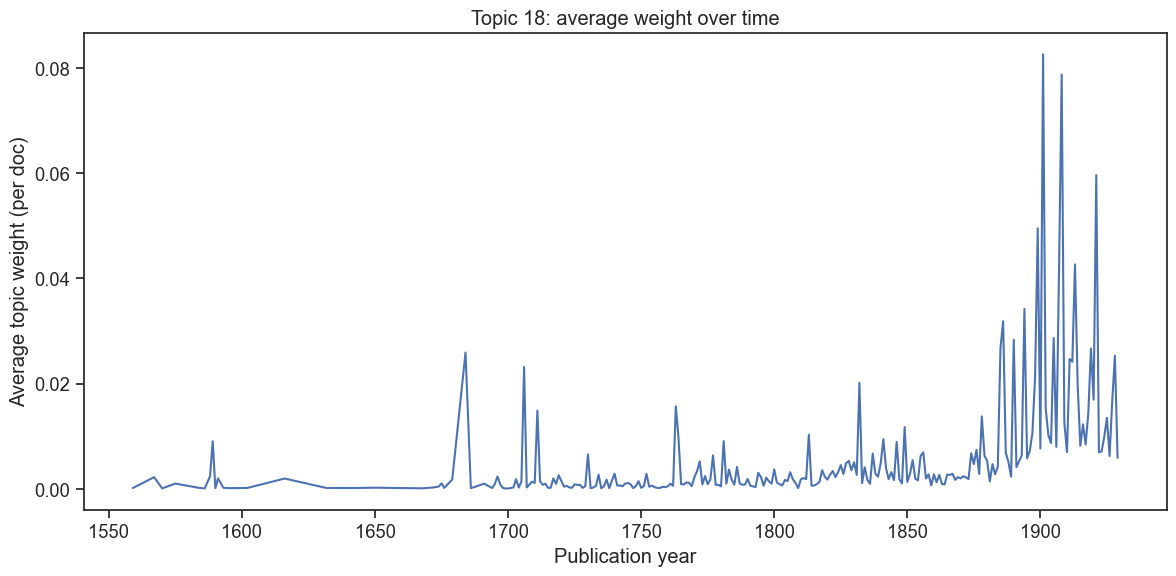

pub_year
1559    0.000157
1567    0.002224
1570    0.000093
1575    0.001002
1584    0.000176
          ...   
1925    0.013493
1926    0.006240
1927    0.016714
1928    0.025332
1929    0.005908
Name: topic_weight, Length: 265, dtype: float64

In [33]:
plot_topic_over_time(topic_number=18, agg="mean")

In [30]:
def plot_four_topics_over_time(
    topic_numbers,
    agg="mean",
    threshold=None,
    min_docs_per_year=1,
    smooth_window=None,
    y_max=0.25
):

    assert len(topic_numbers) == 4, "Please pass exactly four topic numbers."

    fig, axes = plt.subplots(
        nrows=1,
        ncols=4,
        figsize=(18, 5),
        sharex=True,
        sharey=True
    )

    for ax, topic_number in zip(axes, topic_numbers):

        topic_weights = [row[topic_number] for row in topic_distributions]

        if len(topic_weights) != len(df):
            raise ValueError(
                f"Row mismatch for topic {topic_number}: "
                f"{len(topic_weights)} topic rows vs {len(df)} df rows"
            )

        plot_df = df[["pub_year"]].reset_index(drop=True).copy()
        plot_df["topic_weight"] = topic_weights
        plot_df = plot_df.dropna(subset=["pub_year"])
        plot_df["pub_year"] = plot_df["pub_year"].astype(int)

        if agg == "mean":
            yearly = plot_df.groupby("pub_year")["topic_weight"].mean()
            ylab = "Avg topic weight"
        elif agg == "sum":
            yearly = plot_df.groupby("pub_year")["topic_weight"].sum()
            ylab = "Total topic weight"
        elif agg == "median":
            yearly = plot_df.groupby("pub_year")["topic_weight"].median()
            ylab = "Median topic weight"
        elif agg == "share_above_threshold":
            if threshold is None:
                raise ValueError("threshold required for share_above_threshold")
            yearly = plot_df.groupby("pub_year")["topic_weight"].apply(
                lambda s: (s >= threshold).mean()
            )
            ylab = f"Share ≥ {threshold}"
        else:
            raise ValueError("Invalid agg")

        doc_counts = plot_df.groupby("pub_year").size()
        keep_years = doc_counts[doc_counts >= min_docs_per_year].index
        yearly = yearly.loc[keep_years].sort_index()

        if smooth_window is not None and smooth_window > 1:
            yearly = yearly.rolling(
                window=smooth_window,
                center=True,
                min_periods=1
            ).mean()

        ax.plot(yearly.index, yearly.values)
        ax.set_title(f"Topic {topic_number}")
        ax.set_ylim(0, y_max)

    fig.supxlabel("Publication year")
    fig.supylabel(ylab)

    plt.tight_layout()
    plt.show()

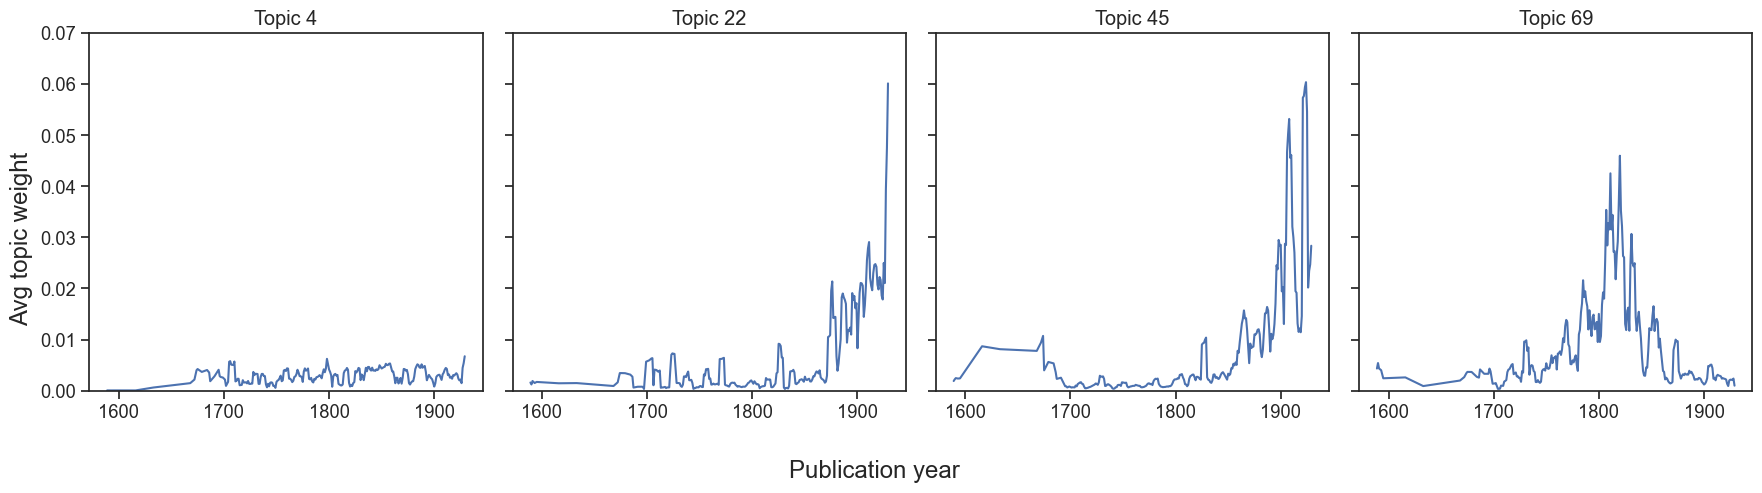

In [32]:
plot_four_topics_over_time(
    topic_numbers=[4, 22, 45, 69],
    agg="mean",
    y_max=0.07,
    smooth_window=5,
    min_docs_per_year=10
)

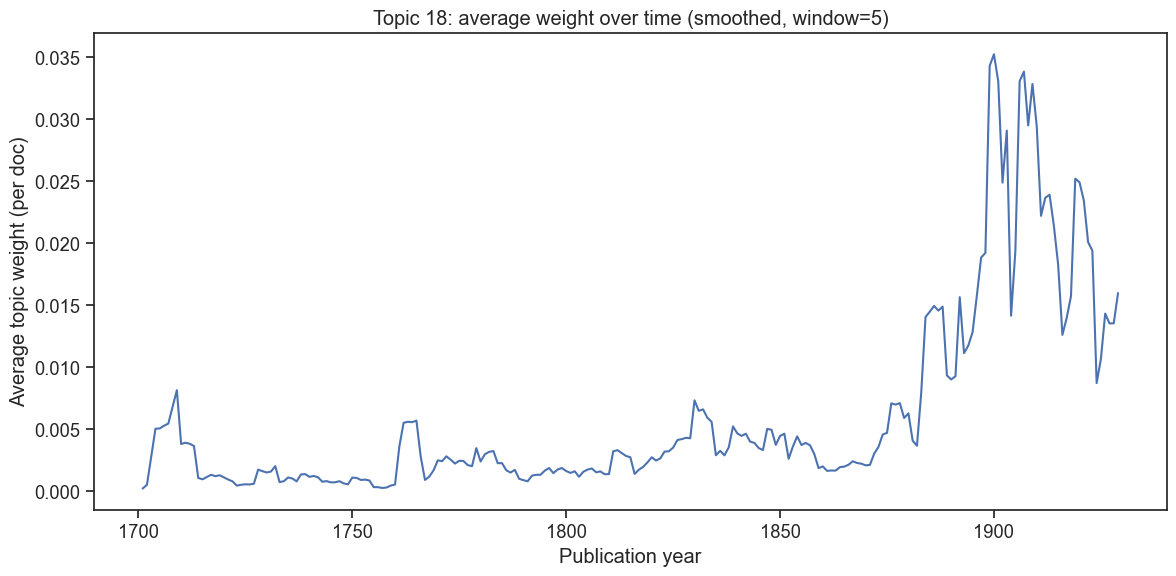

pub_year
1701    0.000161
1702    0.000279
1704    0.000250
1705    0.001408
1706    0.023163
          ...   
1925    0.013493
1926    0.006240
1927    0.016714
1928    0.025332
1929    0.005908
Name: topic_weight, Length: 225, dtype: float64

In [31]:
plot_topic_over_time(
    topic_number=18,
    agg="mean",
    smooth_window=5,
    min_docs_per_year=10,
    start_year=1700
)